In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_evaluation.csv',header=None)

In [3]:
#Give the column names
columns_name = ['feature 1','feature 2','feature 3','feature 4','feature 5','feature 6','target']
df.columns = columns_name

In [4]:
df.shape

(1728, 7)

In [5]:
df.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.tail()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,target
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [7]:
df.columns

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'feature 6', 'target'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   feature 1  1728 non-null   object
 1   feature 2  1728 non-null   object
 2   feature 3  1728 non-null   object
 3   feature 4  1728 non-null   object
 4   feature 5  1728 non-null   object
 5   feature 6  1728 non-null   object
 6   target     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df.isnull().sum()

feature 1    0
feature 2    0
feature 3    0
feature 4    0
feature 5    0
feature 6    0
target       0
dtype: int64

In [10]:
df[df.duplicated()]

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,target


In [11]:
df.describe()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,target
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [12]:
df.columns

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'feature 6', 'target'],
      dtype='object')

In [13]:
df.columns

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'feature 6', 'target'],
      dtype='object')

In [14]:
df

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [34]:
import category_encoders as ce
cols=['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5','feature 6','target']
Encoder1 = ce.OrdinalEncoder(cols)
encoder_dataset = Encoder1.fit_transform(df)

In [35]:
encoder_dataset

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,target
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,4
1724,4,4,4,3,2,3,3
1725,4,4,4,3,3,1,1
1726,4,4,4,3,3,2,4


In [36]:
# Encoder2  = OrdinalEncoder(cols=['target'])
# y_train = Encoder2.fit_transform(y_train)
# y_test = Encoder2.fit(y_test)

In [37]:
x = encoder_dataset.iloc[:,:-1].values
x

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 2],
       [1, 1, 1, 1, 1, 3],
       ...,
       [4, 4, 4, 3, 3, 1],
       [4, 4, 4, 3, 3, 2],
       [4, 4, 4, 3, 3, 3]])

In [38]:
# Note : Here in ordinaryEncoder we need to seperate target column otherwise it will raise error or wrong prdiction values

In [39]:
y = encoder_dataset['target'].values 
y

array([1, 1, 1, ..., 1, 4, 3])

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy')
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

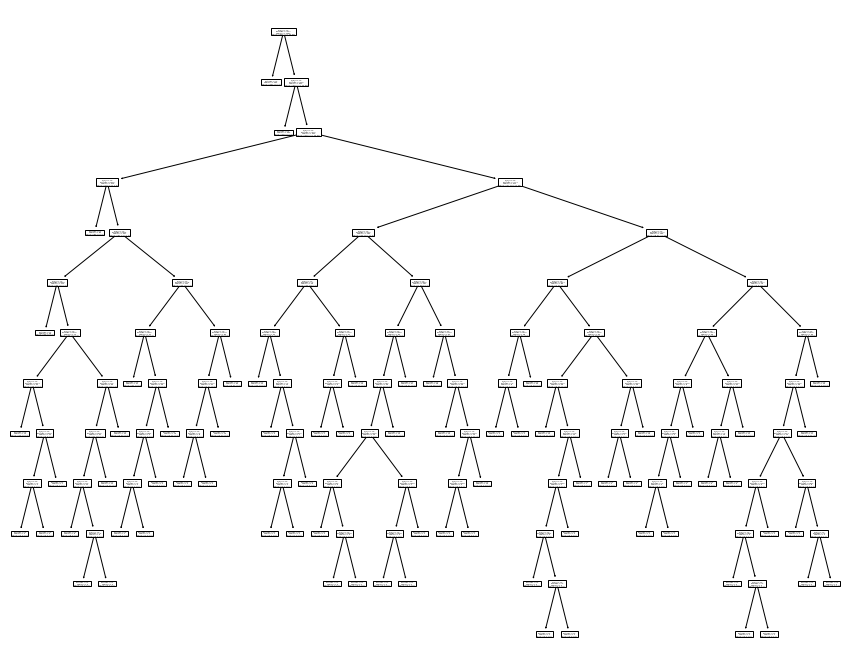

In [51]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
x=tree.plot_tree(dt_classifier)

In [45]:
dt_classifier.score(x_test, y_test)

0.9826589595375722

In [46]:
y_pred = dt_classifier.predict(x_test)
y_pred

array([2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 4, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 3,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 4, 1, 2, 1, 3, 1, 1, 1, 3,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 4, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       2, 1, 4, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 3,

In [47]:
y_test

array([2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 4, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 3,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 4, 1, 2, 1, 3, 1, 1, 1, 3,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 4, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       2, 1, 4, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 3,

In [48]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.9826589595375722

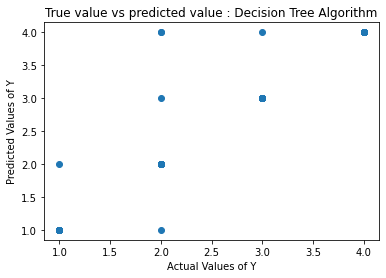

In [50]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values of Y')
plt.ylabel('Predicted Values of Y')
plt.title("True value vs predicted value : Decision Tree Algorithm")
plt.show()